# Steam Flow Data Visualization

<font color = 'violet'>This notebook will display steam flow data for the specified date range and location</font>

In [25]:
"""import libraries"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [61]:
df = pd.read_csv("sf_data.csv")#,sep=',',index_col="Date",parse_dates=True)
df.index = df['Date']

df['sr_u1'] = df['701']/(df['Unit1']*3.6)
df['sr_u2'] = df['702']/(df['Unit2']*3.6)
df['mwe_total'] = df['Unit1'] + df['Unit2']
df['sf_total'] = df['701'] + df['702']
df['sr_ave'] = df['sf_total']/(df['mwe_total']*3.6)
df['sf_bo_total'] = df['701'] + df['702'] + df['701a'] + df['702a'] + df['701b'] + df['702b'] + \
                    df['701c'] + df['702c']
df['bo_total'] = df['701a'] + df['702a'] + df['701b'] + df['702b'] + df['701c'] + df['702c']
df['pad_e'] = df['301-302'] + df['303_304'] + df['305_306']
df['pad_hf'] = df['401_402'] + df['403_404'] + df['405']
df['sf_prs'] = df['pad_e'] + df['pad_hf'] + df['508']
df['diff_prs_if'] = df['sf_prs'] - df['sf_total']
df['diff_prs_bo'] = df['sf_prs'] - df['sf_bo_total']
df['pdiff_prs_if'] = 100 * (df['sf_prs'] - df['sf_total'])/df['sf_total']
df['pdiff_prs_bo'] = 100 * (df['sf_prs'] - df['sf_bo_total'])/df['sf_bo_total']
df['bom_wellhead'] = 1008.2
df['pdiff_bom_if'] = 100 * (df['bom_wellhead'] - df['sf_total'])/df['sf_total']
df['pdiff_bom_bo'] = 100 * (df['bom_wellhead'] - df['sf_bo_total'])/df['sf_bo_total']
df['bom_if'] = 977.95
df['bom_pad_e'] = 418.68
df['bom_pad_hf'] = 510.12
df['bom_pad_c'] = 79.2

In [62]:
def get_data(dates, full_df, cols):
    """create a df with the specified date range and variables to plot"""
    #Create a dataframe with the given date range as index
    df = pd.DataFrame(index=dates)
    #Read the WHP data from the .csv file
    df_temp = full_df[cols]
    #Join the given date_range data frame with the imported whp dataframe                    
    df = df.join(df_temp)
    return df

def plot_data(df, ylabel, title):
    #Define size of the plot
    matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
    """Plot stock WHP with a custom title and axis labels"""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date", fontsize=16)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.grid(True)
    plt.xticks(rotation='vertical')
    plt.show()
    
def nan_outlier(group, stds):
    """This function will replace outlier with nan; use 1sd:68% 1.96sd:95% 3sd:99%"""
    pd.options.mode.chained_assignment = None  # default='warn'
    group[np.abs(group - group.mean()) > stds * group.std()] = np.nan
    return group

def clip_below(group, cut_off):
    """This function will replace outlier with nan; use 1sd:68% 1.96sd:95% 3sd:99%"""
    pd.options.mode.chained_assignment = None  # default='warn'
    group[group < cut_off ] = np.nan
    return group

def clip_above(group, cut_off):
    """This function will replace outlier with nan; use 1sd:68% 1.96sd:95% 3sd:99%"""
    pd.options.mode.chained_assignment = None  # default='warn'
    group[group > cut_off ] = np.nan
    return group

In [47]:
"""Define Date Range Here"""
start_date = '2016-07-06 00:00:00'      
end_date = '2016-09-20 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')
%matplotlib inline
title = ""
yl_sf = "Steam Flow (TPH)"
yl_mwe = "MWe"
yl_diff = "% Difference"
yl_whp = "WHP (kscg)"

# Total MWe and SF (no data filter)

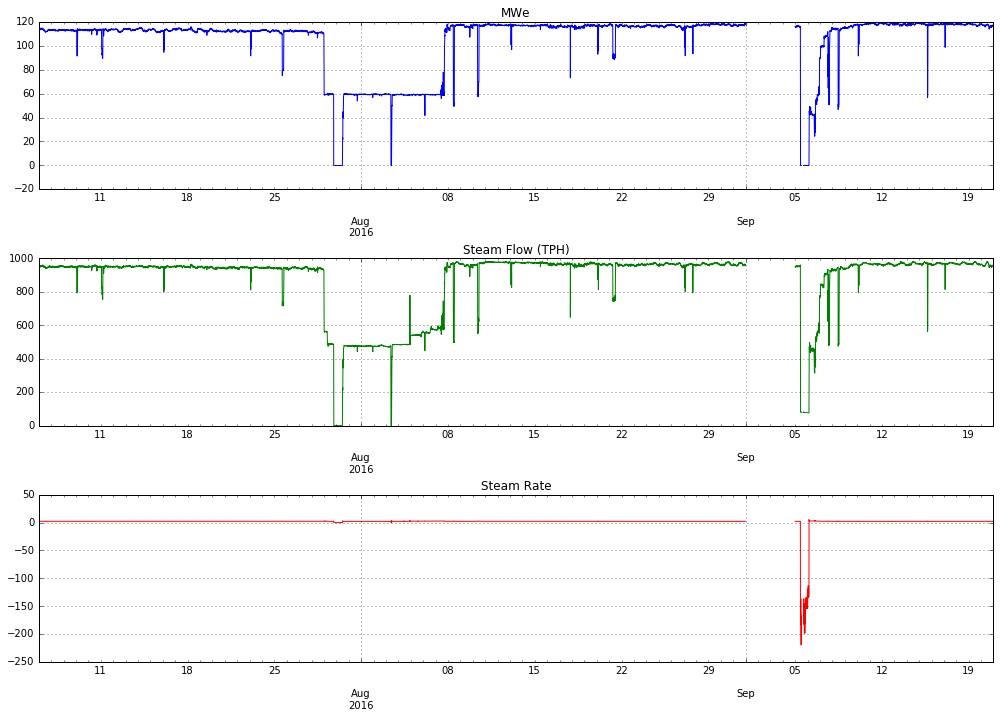

In [64]:
variables = ['Date', 'mwe_total', 'sf_total', 'sr_ave']
df_temp =  get_data(dates, df, variables)
#clip_below(df_temp['mwe_total'], 56)
#clip_below(df_temp['sf_total'], 460)
#clip_below(df_temp['sr_ave'], 2.15)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14,10))
df_temp['mwe_total'].plot(ax=axes[0], color='b'); axes[0].set_title('MWe'); axes[0].grid(True)
df_temp['sf_total'].plot(ax=axes[1], color='g'); axes[1].set_title('Steam Flow (TPH)'); axes[1].grid(True)
df_temp['sr_ave'].plot(ax=axes[2], color='r'); axes[2].set_title('Steam Rate'); axes[2].grid(True)
fig.tight_layout()

,mwe_total,sf_total,sr_ave
count,8679.000000,8668.000000,9636.000000
mean,115.396576,957.553893,2.300272
std,2.402319,12.479894,0.032144
min,105.309998,901.459168,2.161222
25%,113.159998,948.307861,2.278830
50%,116.199997,958.699432,2.304367
75%,117.439995,967.206238,2.324186
max,119.639999,981.695953,2.398125


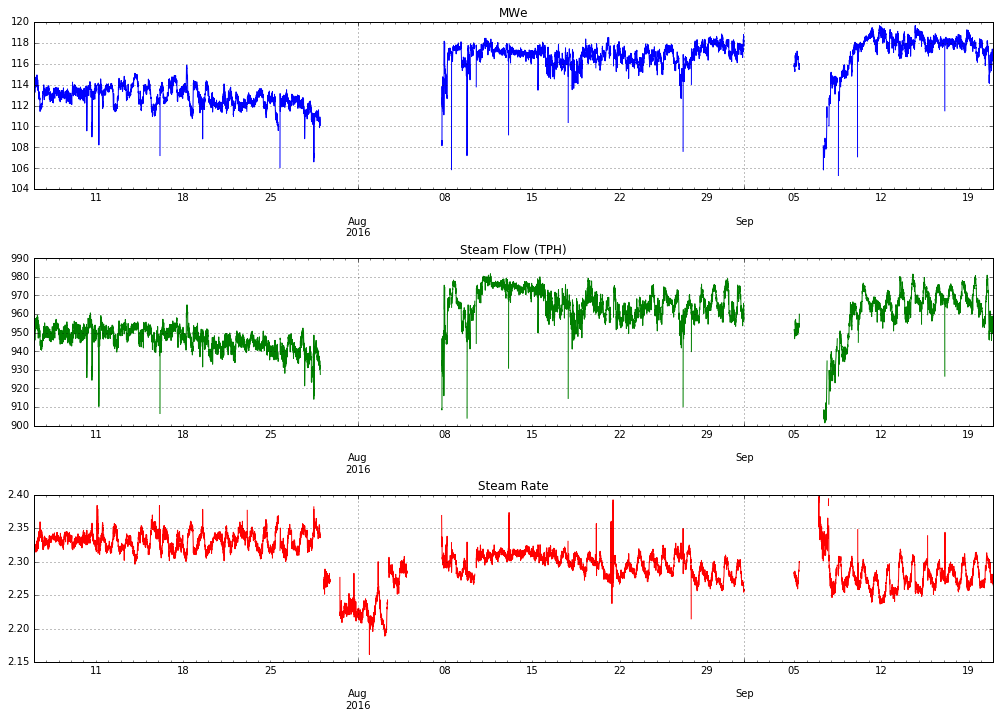

In [79]:
variables = ['Date', 'mwe_total', 'sf_total', 'sr_ave']
df_temp =  get_data(dates, df, variables)
clip_below(df_temp['mwe_total'], 105)
clip_below(df_temp['sf_total'], 900)
clip_below(df_temp['sr_ave'], 2.15)
clip_above(df_temp['sr_ave'], 2.4)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14,10))
df_temp['mwe_total'].plot(ax=axes[0], color='b'); axes[0].set_title('MWe'); axes[0].grid(True)
df_temp['sf_total'].plot(ax=axes[1], color='g'); axes[1].set_title('Steam Flow (TPH)'); axes[1].grid(True)
df_temp['sr_ave'].plot(ax=axes[2], color='r'); axes[2].set_title('Steam Rate'); axes[2].grid(True)
fig.tight_layout()
df_temp.describe()

## Histogram of Steam Flow

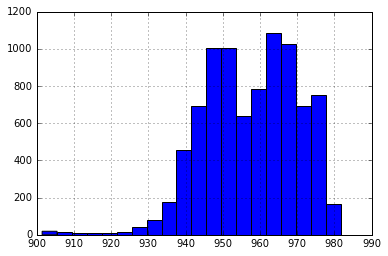

In [86]:
df_temp['sf_total'].hist(bins=20)

# STL701 Subplots [ MWe, SF, SR ]

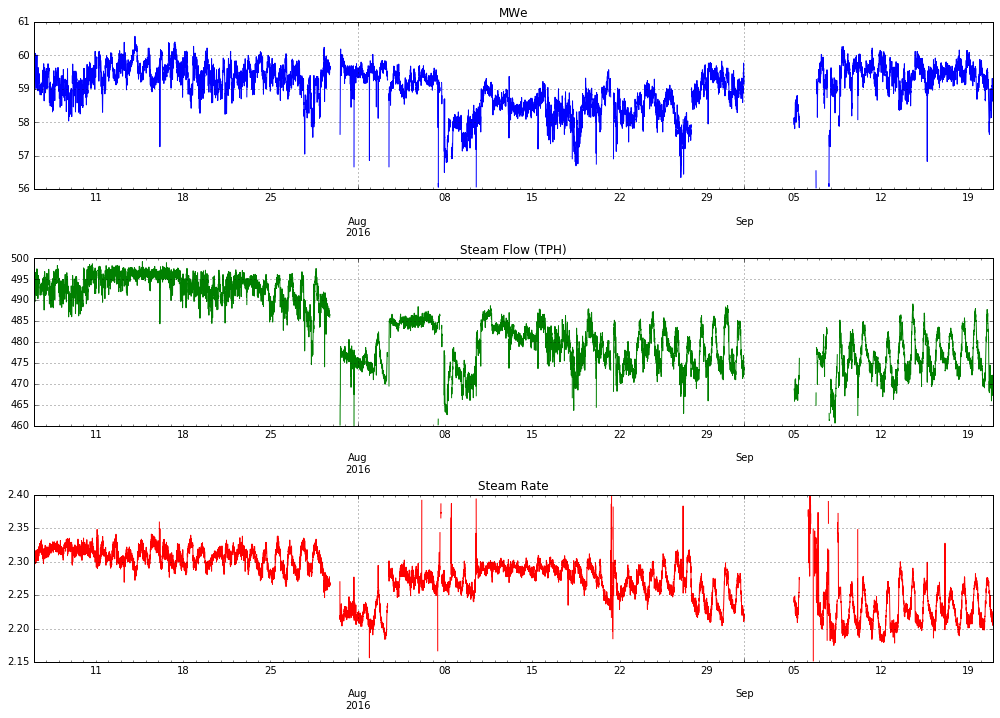

In [59]:
variables = ['Date', 'Unit1', '701', 'sr_u1']
df_temp =  get_data(dates, df, variables)
clip_below(df_temp['Unit1'], 56)
clip_below(df_temp['701'], 460)
clip_below(df_temp['sr_u1'], 2.15)
clip_above(df_temp['sr_u1'], 2.4)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14,10))
df_temp['Unit1'].plot(ax=axes[0], color='b'); axes[0].set_title('MWe'); axes[0].grid(True)
df_temp['701'].plot(ax=axes[1], color='g'); axes[1].set_title('Steam Flow (TPH)'); axes[1].grid(True)
df_temp['sr_u1'].plot(ax=axes[2], color='r'); axes[2].set_title('Steam Rate'); axes[2].grid(True)
fig.tight_layout()

# STL702 Subplots [ MWe, SF, SR ]

,Unit2,702,sr_u2
count,8682.000000,8738.000000,8684.000000
mean,56.450942,474.161912,2.335429
std,2.479177,17.686362,0.021840
min,50.070000,402.002930,2.280874
25%,53.910000,455.248215,2.318209
50%,57.919998,484.092545,2.333454
75%,58.559998,489.334999,2.349748
max,60.139999,500.442291,2.399714


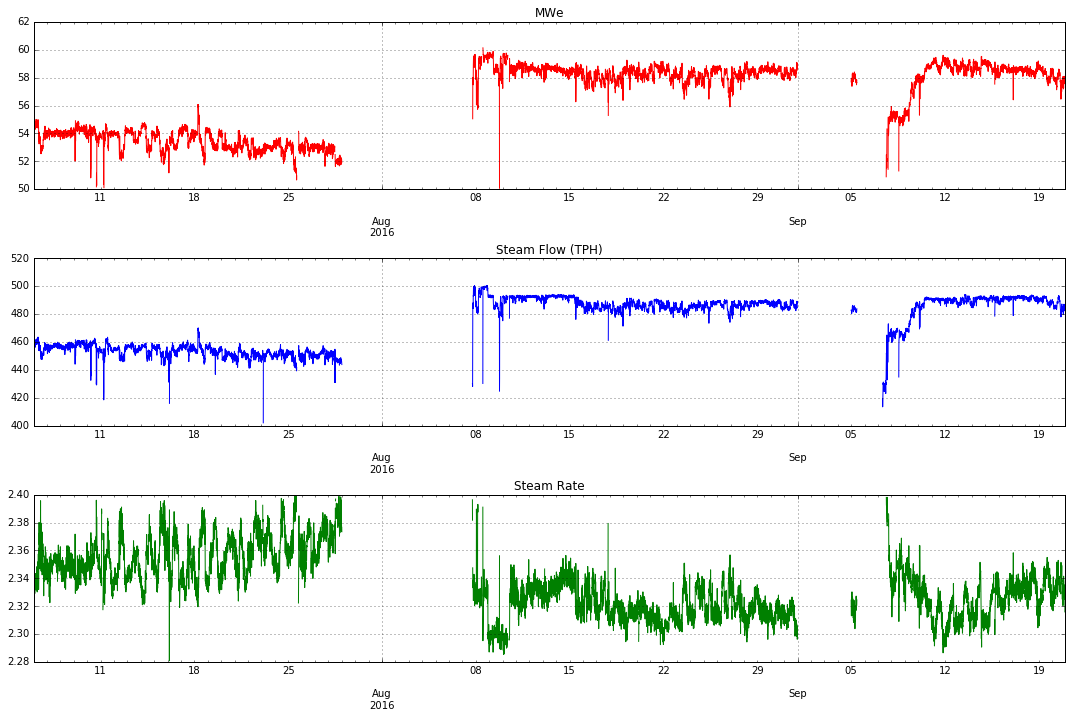

In [30]:
variables = ['Date', 'Unit2', '702', 'sr_u2']
df_temp =  get_data(dates, df, variables)
clip_below(df_temp['Unit2'], 50)
clip_below(df_temp['702'], 400)
clip_below(df_temp['sr_u2'], 2.2)
clip_above(df_temp['sr_u2'], 2.4)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
df_temp['Unit2'].plot(ax=axes[0], color='r'); axes[0].set_title('MWe'); axes[0].grid(True)
df_temp['702'].plot(ax=axes[1], color='b'); axes[1].set_title('Steam Flow (TPH)'); axes[1].grid(True)
df_temp['sr_u2'].plot(ax=axes[2], color='g'); axes[2].set_title('Steam Rate'); axes[2].grid(True)
fig.tight_layout()

df_temp.describe()

# Interface

          sf_total           701          702
count  8612.000000  10093.000000  8738.000000
mean    957.870181    482.652581   474.161912
std      11.877892      9.918700    17.686362
min     921.132416    401.232056   402.002930
25%     948.482613    475.755341   455.248215
50%     958.799957    482.168182   484.092545
75%     967.262161    491.520172   489.334999
max     981.695953    499.200287   500.442291


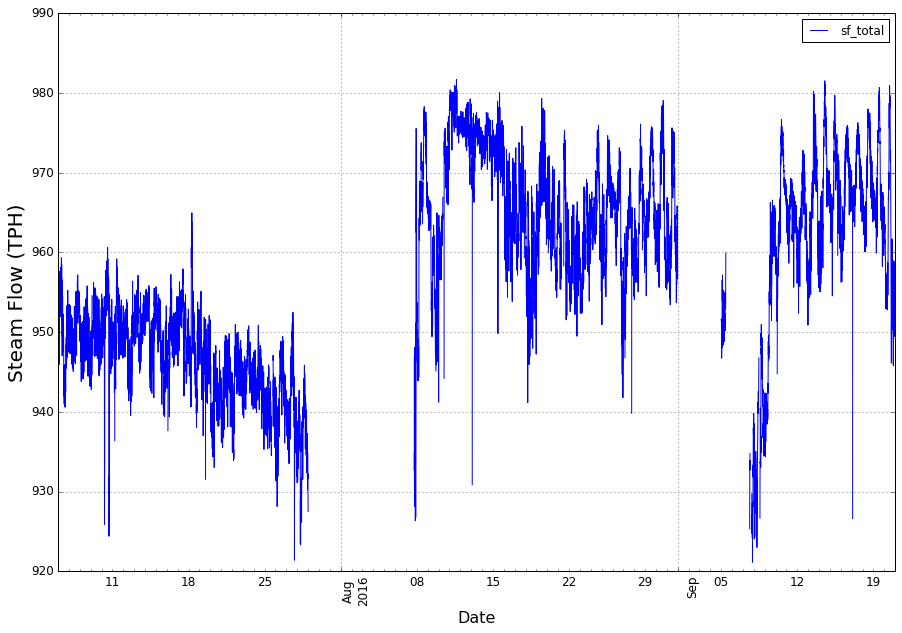

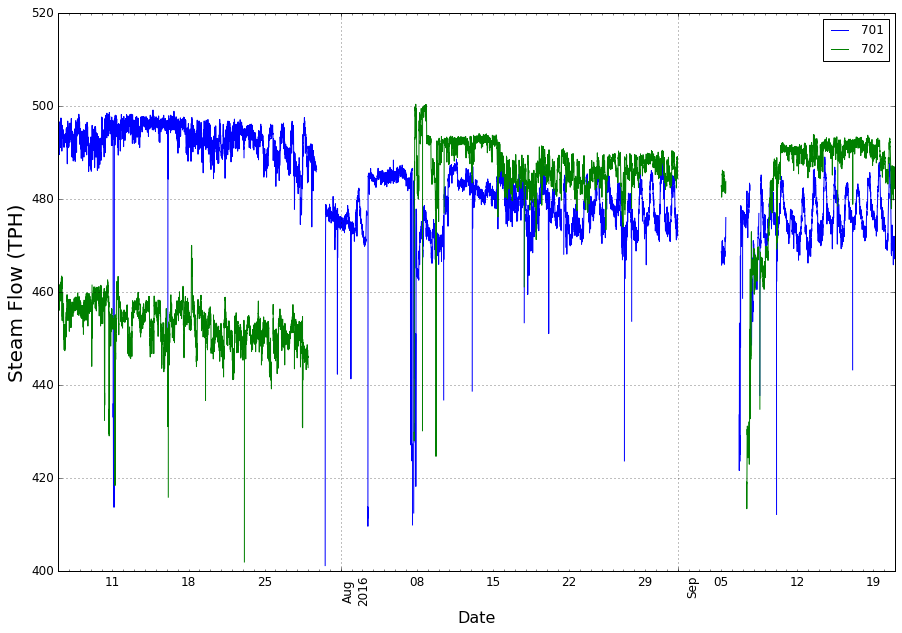

In [49]:
variables = ['Date', 'sf_total', '701', '702']
df_temp = get_data(dates, df, variables)
clip_below(df_temp['sf_total'], 920)
clip_below(df_temp['701'], 400)
clip_below(df_temp['702'], 400)
print df_temp.describe()
plot_data(df_temp[['sf_total']], yl_sf, title)
plot_data(df_temp[['701','702']], yl_sf, title)

# Output

         mwe_total         Unit1        Unit2
count  8605.000000  10107.000000  8743.000000
mean    115.458291     58.979882    56.397114
std       2.316233      1.050918     2.554152
min     110.029995     45.000000    45.430000
25%     113.199997     58.649998    53.884998
50%     116.229996     59.189999    57.910000
75%     117.449997     59.529999    58.559998
max     119.639999     60.570000    60.139999


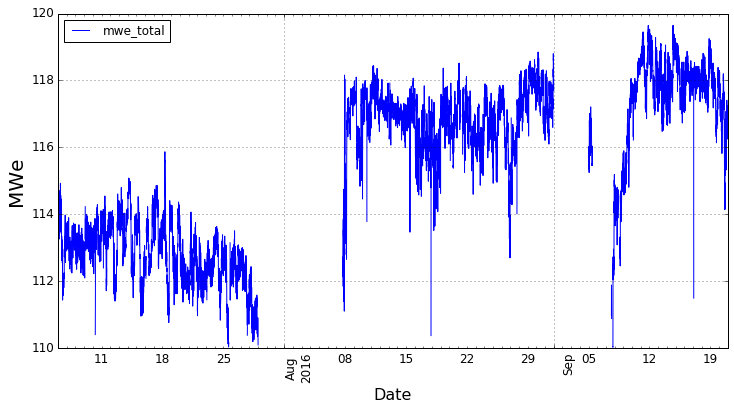

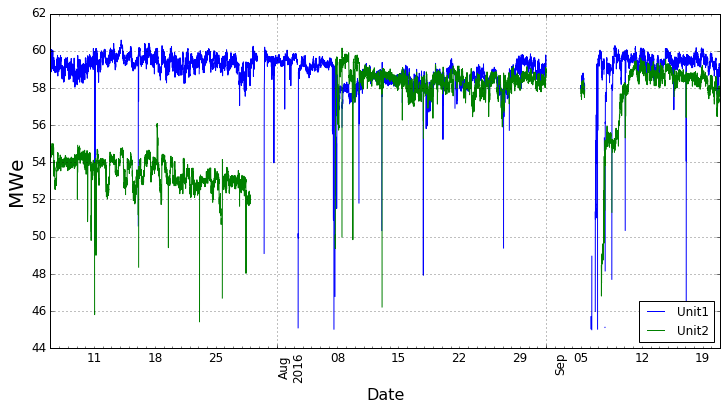

In [32]:
variables = ['Date', 'mwe_total', 'Unit1', 'Unit2']
df_temp = get_data(dates, df, variables)
clip_below(df_temp['mwe_total'], 110)
clip_below(df_temp['Unit1'], 45)
clip_below(df_temp['Unit2'], 45)
print df_temp.describe()
plot_data(df_temp[['mwe_total']], yl_mwe, title)
plot_data(df_temp[['Unit1','Unit2']], yl_mwe, title)

# PAD H and F PRS Flow Meter

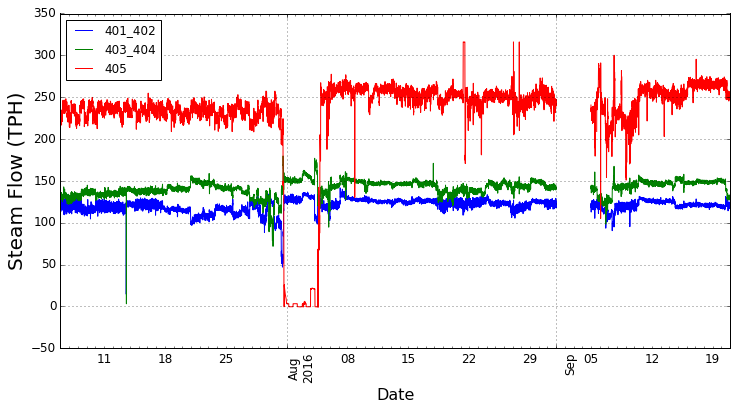

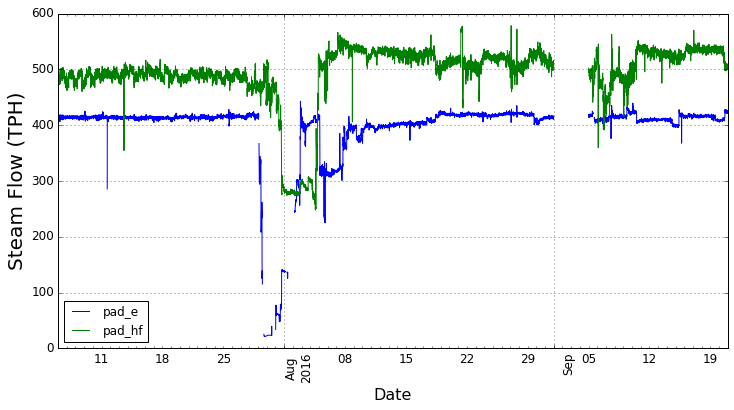

In [33]:
variables = ['Date', '401_402', '403_404', '405']
df_temp = get_data(dates, df, variables)
#clip_below(df_temp['sr_u1'], 2)
#clip_below(df_temp['sr_u2'], 2)
#clip_above(df_temp['sr_u1'], 2.5)
#clip_above(df_temp['sr_u2'], 2.5)
#print df_temp.describe()
#clip_below(df_temp['405'], 50)
plot_data(df_temp, yl_sf, title)

variables = ['Date', 'pad_e', 'pad_hf']
df_temp = get_data(dates, df, variables)
#clip_below(df_temp['pad_e'], 350)
plot_data(df_temp, yl_sf, title)

# Steam Rate

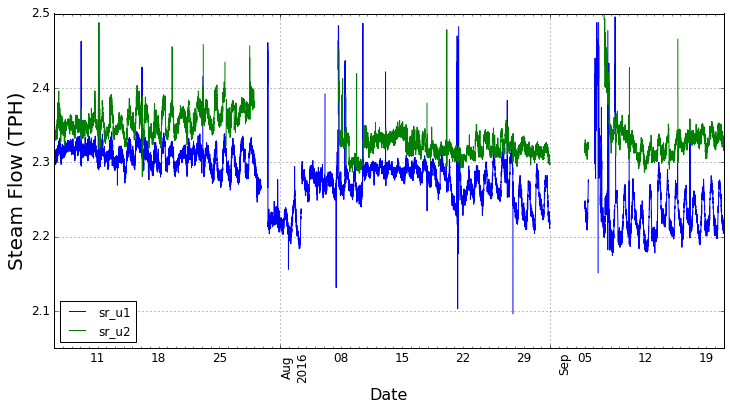

In [34]:
variables = ['Date', 'sr_u1', 'sr_u2']
df_temp = get_data(dates, df, variables)
clip_below(df_temp['sr_u1'], 2)
clip_below(df_temp['sr_u2'], 2)
clip_above(df_temp['sr_u1'], 2.5)
clip_above(df_temp['sr_u2'], 2.5)
#print df_temp.describe()
plot_data(df_temp, yl_sf, title)

# PAL25D WHP

,PAL25D,pad_hf,701,Unit1
PAL25D,1.000000,-0.130181,0.424813,0.273436
pad_hf,-0.130181,1.000000,-0.037267,-0.209391
701,0.424813,-0.037267,1.000000,0.426601
Unit1,0.273436,-0.209391,0.426601,1.000000


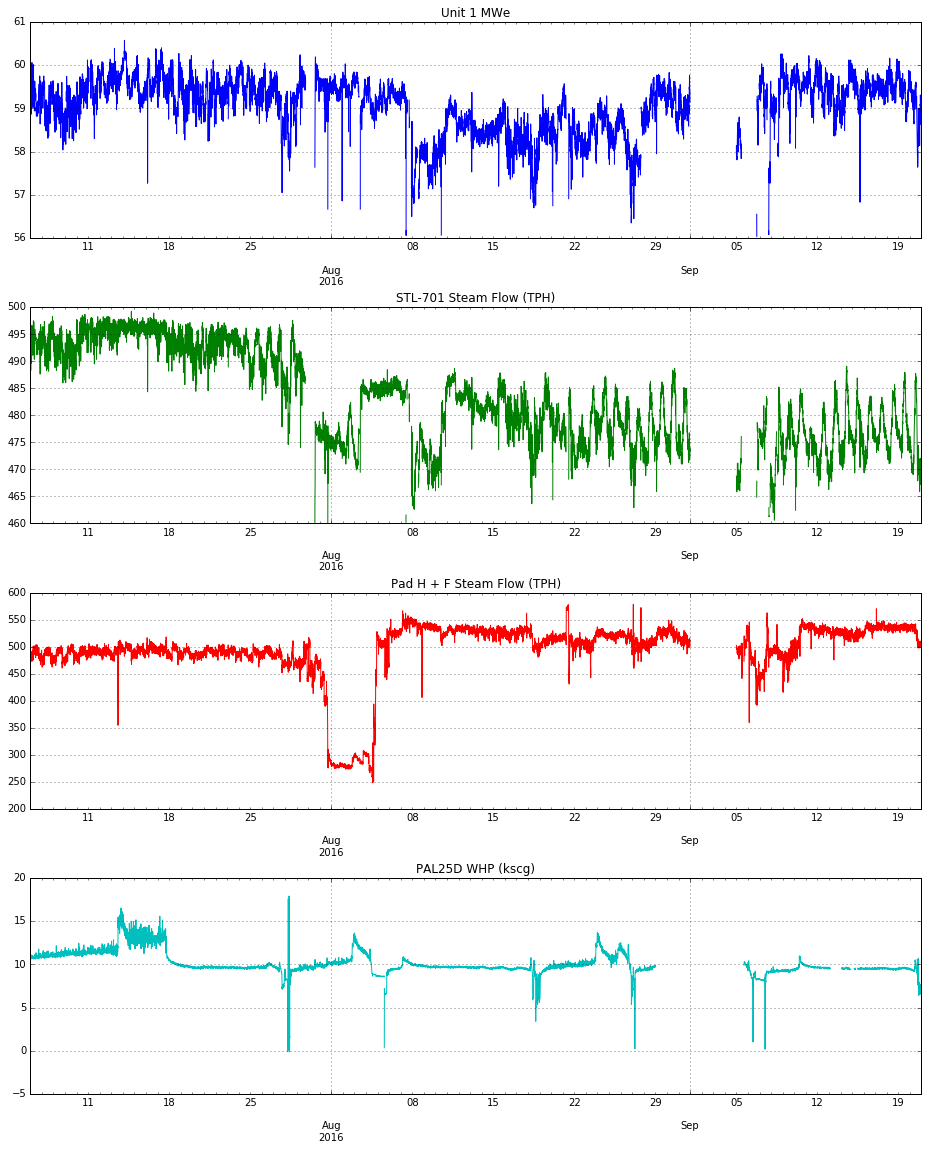

In [58]:
#variables = ['Date', 'PAL25D']
#df_temp = get_data(dates, df, variables)
#clip_below(df_temp['PAL25D'], 6)
#clip_above(df_temp['PAL25D'], 14)
#plot_data(df_temp, yl_whp, title)
%matplotlib inline

variables = ['Date', 'PAL25D', 'pad_hf', '701', 'Unit1']
df_temp =  get_data(dates, df, variables)
clip_below(df_temp['Unit1'], 56)
clip_below(df_temp['701'], 460)
#clip_below(df_temp['sr_u1'], 2.15)
#clip_above(df_temp['sr_u1'], 2.4)

#ax = df_temp.plot(subplots = True, figsize=(15,10))

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(13,16))
df_temp['Unit1'].plot(ax=axes[0], color='b'); axes[0].set_title('Unit 1 MWe'); axes[0].grid(True)
df_temp['701'].plot(ax=axes[1], color='g'); axes[1].set_title('STL-701 Steam Flow (TPH)'); axes[1].grid(True)
df_temp['pad_hf'].plot(ax=axes[2], color='r'); axes[2].set_title('Pad H + F Steam Flow (TPH)'); axes[2].grid(True)
df_temp['PAL25D'].plot(ax=axes[3], color='c'); axes[3].set_title('PAL25D WHP (kscg)'); axes[3].grid(True)
fig.tight_layout()

df_temp.corr()

## Steam Flow at Pad E and Pad H+F

              pad_e        pad_hf     bom_pad_e    bom_pad_hf
count  10253.000000  10488.000000  1.108700e+04  1.108700e+04
mean     395.439877    493.438230  4.186800e+02  5.101200e+02
std       65.171970     56.468201  3.740466e-11  9.027142e-11
min        0.000000    247.821515  4.186800e+02  5.101200e+02
25%      405.640472    486.000339  4.186800e+02  5.101200e+02
50%      413.256775    502.906017  4.186800e+02  5.101200e+02
75%      416.392105    526.457428  4.186800e+02  5.101200e+02
max      442.478394    578.217422  4.186800e+02  5.101200e+02


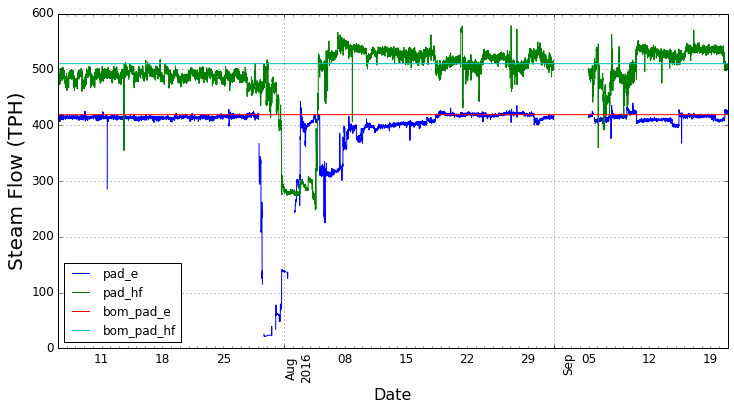

In [36]:
variables = ['Date', 'pad_e', 'pad_hf', 'bom_pad_e', 'bom_pad_hf']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

## Steam after Pad H and Pad F Separator Stations

            401_402       403_404           405
count  10488.000000  10488.000000  10488.000000
mean     120.668752    141.923101    230.846377
std        7.891527      9.072108     57.139790
min       14.687819      3.175625     -0.574343
25%      117.218054    137.061066    231.605526
50%      122.011250    143.364960    243.288788
75%      125.647480    148.201241    255.711395
max      142.286194    179.821701    316.030792


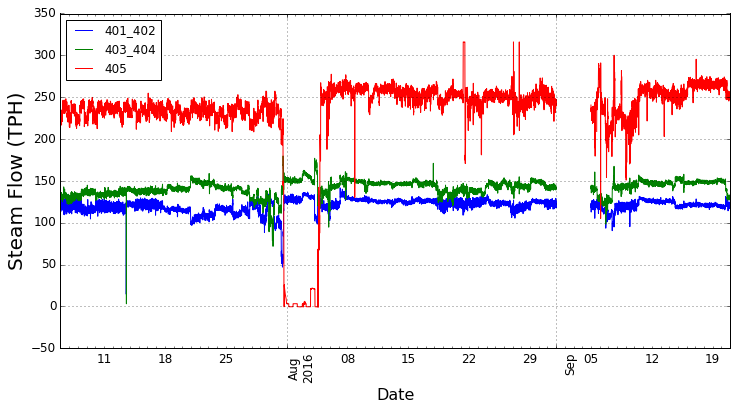

In [37]:
variables = ['Date', '401_402', '403_404', '405']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

## Pad C Flow Meter

                508     bom_pad_c
count  10488.000000  1.108700e+04
mean      68.105737  7.920000e+01
std       22.655341  1.385621e-11
min        0.083981  7.920000e+01
25%       58.651088  7.920000e+01
50%       62.725636  7.920000e+01
75%       78.598543  7.920000e+01
max      200.544327  7.920000e+01


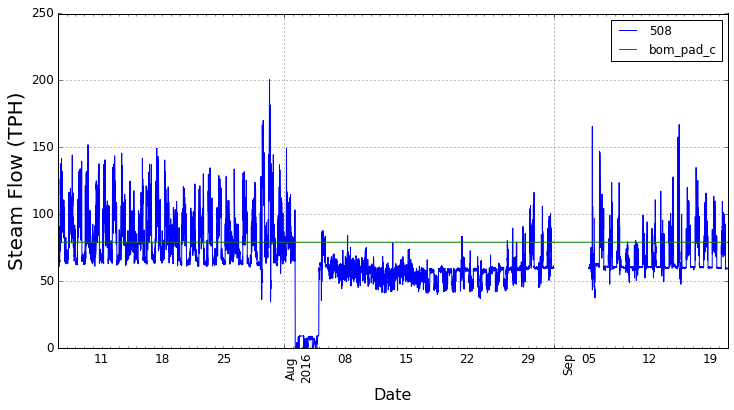

In [38]:
variables = ['Date', '508', 'bom_pad_c']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

## Is cycling steam flow data due to cycling WHP of PAL24D?

             PAL24D
count  11063.000000
mean       8.891422
std        1.112806
min        0.807281
25%        8.179596
50%        8.818278
75%        9.507475
max       19.725973


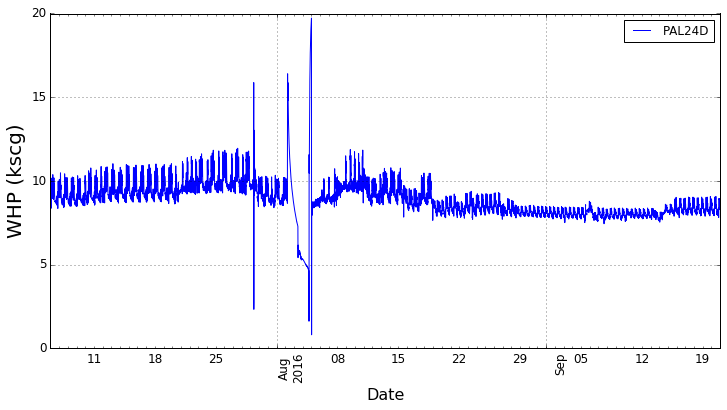

In [39]:
variables = ['Date', 'PAL24D']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_whp, title)

## What is the correlation between Pad C steam flow and PAL24D WHP?

In [40]:
variables = ['Date', '508', 'PAL24D']
df_temp = get_data(dates, df, variables)
df_temp.corr()

,508,PAL24D
508,1.000000,0.265427
PAL24D,0.265427,1.000000


## Steam Flow - WHP trend BEFORE maintenance

               508     bom_pad_c
count  5610.000000  5.616000e+03
mean     68.528149  7.920000e+01
std      26.608674  7.603484e-12
min       0.083981  7.920000e+01
25%      56.904708  7.920000e+01
50%      65.266098  7.920000e+01
75%      84.305841  7.920000e+01
max     200.544327  7.920000e+01


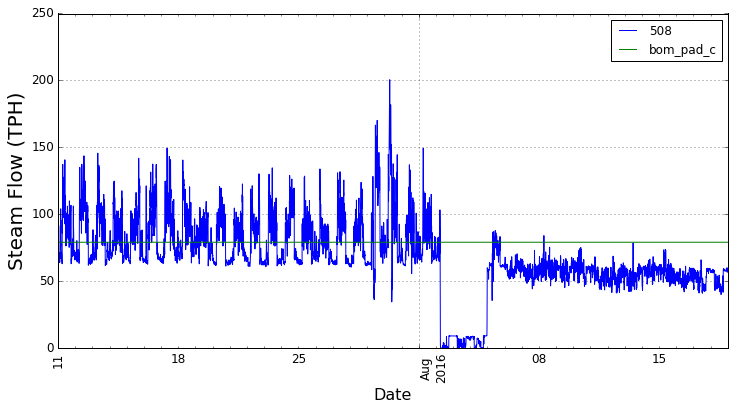

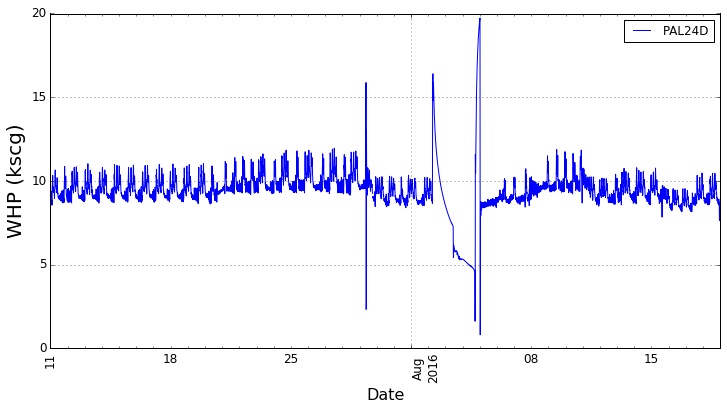

            PAL24D
count  5610.000000
mean      9.429739
std       1.281723
min       0.807281
25%       8.988718
50%       9.445935
75%       9.854662
max      19.725973


In [41]:
"""Define Date Range Here"""
start_date = '2016-07-11 00:00:00'      
end_date = '2016-08-18 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')

variables = ['Date', '508', 'bom_pad_c']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

variables = ['Date', 'PAL24D']
df_temp = get_data(dates, df, variables)
plot_data(df_temp, yl_whp, title)
print df_temp.describe()

## Steam Flow - WHP trend AFTER maintenance

#### 508 flow meter std decreased from 18.8 to 6.5; mean decreased from 85.9 to 55

               508     bom_pad_c
count  1152.000000  1.152000e+03
mean     55.037121  7.920000e+01
std       6.508449  1.691826e-12
min      37.217323  7.920000e+01
25%      49.516374  7.920000e+01
50%      57.805058  7.920000e+01
75%      59.277765  7.920000e+01
max      83.549797  7.920000e+01


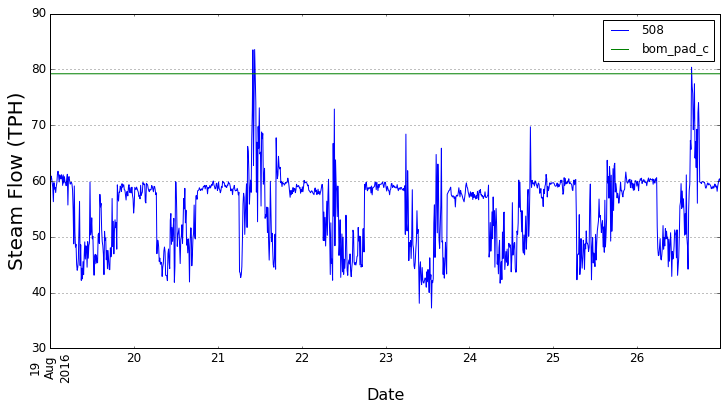

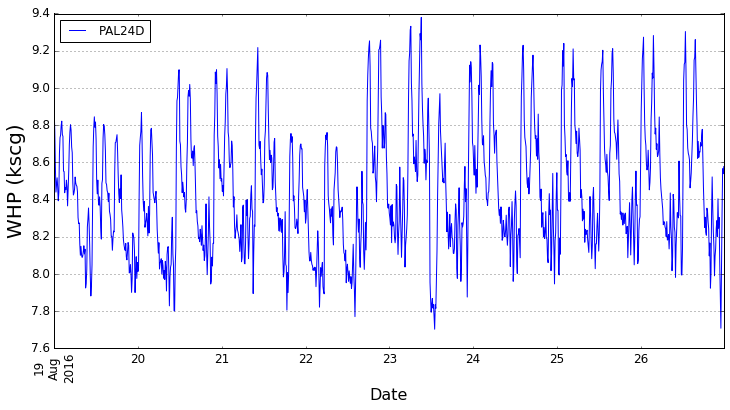

            PAL24D
count  1152.000000
mean      8.446130
std       0.327728
min       7.702615
25%       8.203902
50%       8.396196
75%       8.672827
max       9.379069


In [42]:
"""Define Date Range Here"""
start_date = '2016-08-19 00:00:00'      
end_date = '2016-08-26 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')

variables = ['Date', '508', 'bom_pad_c']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

variables = ['Date', 'PAL24D']
df_temp = get_data(dates, df, variables)
plot_data(df_temp, yl_whp, title)
print df_temp.describe()

## Pad F (SV 405) steam flow data BEFORE and AFTER maintenance

               405
count  1152.000000
mean    234.944356
std       6.169893
min     208.873795
25%     231.010128
50%     235.330978
75%     239.454525
max     254.853256


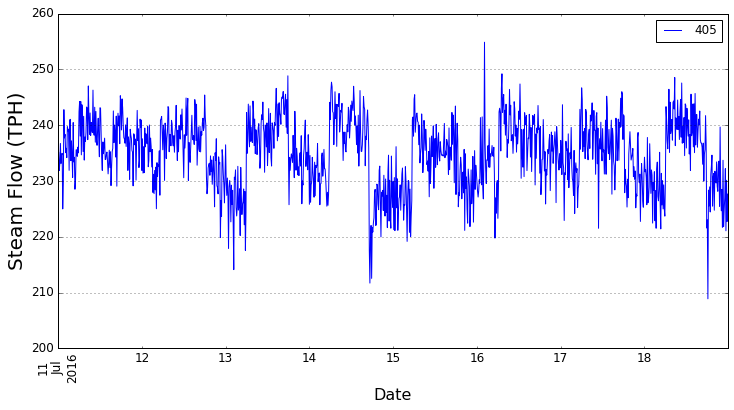

               405
count  1008.000000
mean    255.414778
std       6.744029
min     228.758850
25%     251.863228
50%     256.545990
75%     260.217873
max     271.752655


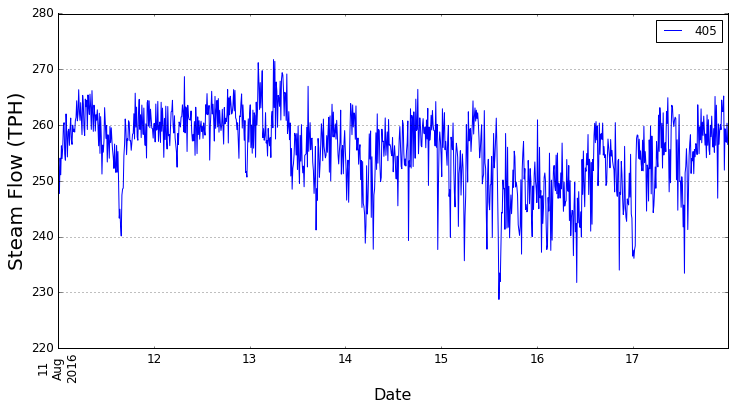

In [43]:
"""Define Date Range Here"""
start_date = '2016-07-11 00:00:00'      
end_date = '2016-07-18 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')

variables = ['Date', '405']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

"""Define Date Range Here"""
start_date = '2016-08-11 00:00:00'      
end_date = '2016-08-17 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')

variables = ['Date', '405']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

$$\pi = frac{C}{D}  $$